In [1]:
%%capture
!pip install mysql.connector

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


  Using cached mysql-connector-2.2.9.tar.gz (11.9 MB)
Using legacy setup.py install for mysql.connector, since package 'wheel' is not installed.
    Running setup.py install for mysql.connector: started
    Running setup.py install for mysql.connector: finished with status 'done'


You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import mysql.connector
import seaborn as sns
import numpy as np

In [3]:
def queryexec(query):
    cnx = mysql.connector.connect(user='root', password='dwsenha',
                                host='localhost', port='3311',
                                database='ENADE')
    cursor = cnx.cursor()
    cursor.execute(query)
    df = pd.DataFrame(cursor.fetchall(), columns=cursor.column_names)
    cnx.close()
    return df

### Pergunta 1

In [46]:
ds_idade = queryexec("""
select nt_ger, nu_idade, du.tp_instituicao
from fato_aluno 
    inner join dim_universidade du on fato_aluno.fk_universidade = du.id
""")
ds_idade.dropna(inplace=True)
ds_idade.head()

nt_ger  nu_idade tp_instituicao
0   52.6        26        PUBLICA
1   63.1        23        PUBLICA
2   33.7        23        PUBLICA
3   58.1        23        PUBLICA
4   46.3        24        PUBLICA

In [47]:
ds_idade.nt_ger = ds_idade.nt_ger.astype(float)

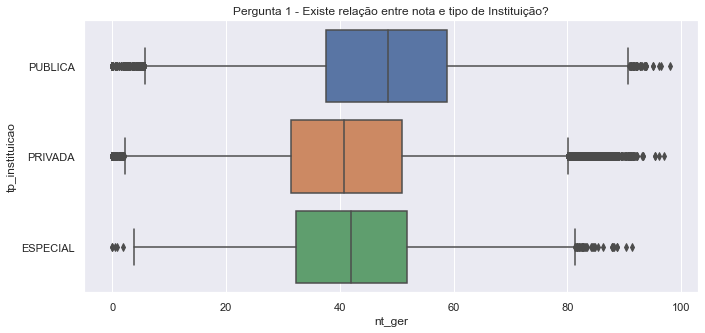

In [54]:
ax = sns.boxplot(data=ds_idade, y='tp_instituicao', x='nt_ger')
t = ax.set_title("Pergunta 1 - Existe relação entre nota e tipo de Instituição?")

### Pergunta 2

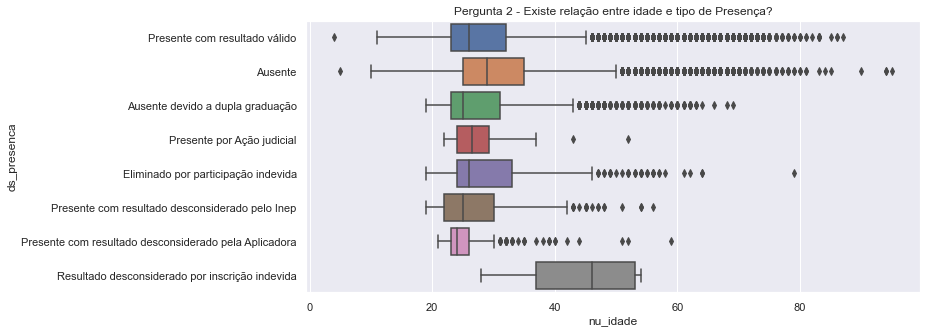

In [55]:
ds_presenca = queryexec("""
select dp.ds_presenca, nu_idade
from fato_aluno
    inner join dim_presenca dp on fato_aluno.fk_presenca = dp.id
""")

sns.set(rc={'figure.figsize':(11,5)})
ax = sns.boxplot(data=ds_presenca, x='nu_idade', y='ds_presenca')
t = ax.set_title("Pergunta 2 - Existe relação entre idade e tipo de Presença?")

In [15]:
ds_presenca.head()

ds_presenca  nu_idade
0  Presente com resultado válido        26
1  Presente com resultado válido        23
2  Presente com resultado válido        23
3  Presente com resultado válido        23
4  Presente com resultado válido        24

### Pergunta 3

In [21]:
ds_sexo = queryexec("""
select ds.tp_sexo, dp.nu_ano, count(*) as quant
from fato_aluno
    inner join dim_sexo ds on fato_aluno.fk_sexo = ds.id
    inner join dim_prova dp on fato_aluno.fk_prova = dp.id
group by tp_sexo, nu_ano
""")

ds_sexo

tp_sexo  nu_ano   quant
0       M    2017  245329
1       M    2018  222548
2       M    2019  200651
3       F    2017  292107
4       F    2018  325579
5       F    2019  233279

[(0.0, 390694.8)]

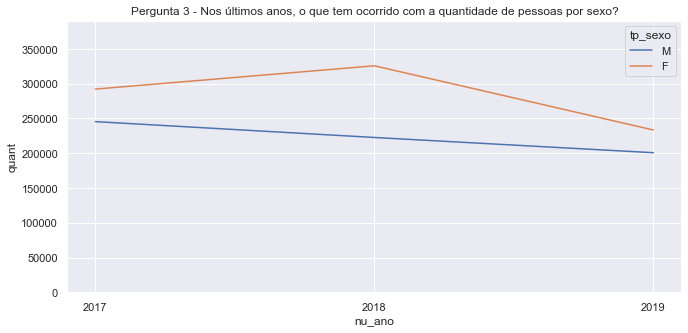

In [56]:
ds_sexo.nu_ano = ds_sexo.nu_ano.astype(str)

ax = sns.lineplot(data=ds_sexo, x='nu_ano', y='quant', hue='tp_sexo')
t = ax.set_title("Pergunta 3 - Nos últimos anos, o que tem ocorrido com a quantidade de pessoas por sexo?")

ax.set(ylim=(0, np.max(ds_sexo.quant*1.2)))

### Pergunta 4

In [31]:
ds_regiao = queryexec("""
select ds_regiao, count(*) as quantidade
from(
    select distinct dc.ds_regiao, du.no_instituicao
    from fato_aluno
        inner join dim_universidade du on fato_aluno.fk_universidade = du.id
        inner join dim_curso dc on fato_aluno.fk_curso = dc.id) tmp
group by ds_regiao
""")
ds_regiao.head()

ds_regiao  quantidade
0  Região Centro-Oeste (CO)         111
1      Região Nordeste (NE)         261
2         Região Norte (NO)         101
3       Região Sudeste (SE)         538
4          Região Sul (SUL)         206

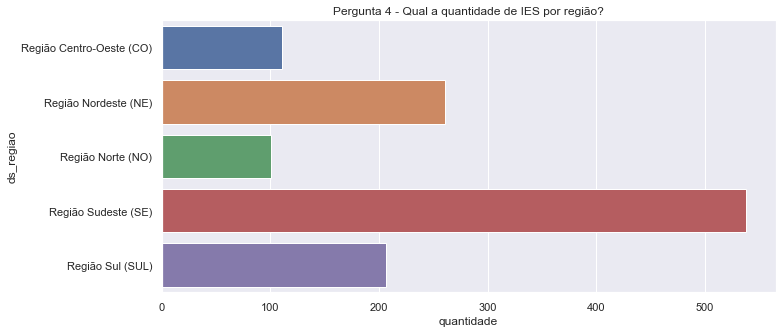

In [57]:
ax = sns.barplot(data=ds_regiao, x='quantidade', y='ds_regiao')
t = ax.set_title("Pergunta 4 - Qual a quantidade de IES por região?")

### Pergunta 5

In [35]:
ds_univ = queryexec("""
select du.no_instituicao, nt_ger
from fato_aluno
    inner join dim_universidade du on fato_aluno.fk_universidade = du.id
    inner join dim_curso dc on fato_aluno.fk_curso = dc.id
where
      dc.ds_uf_curso = "Rio de Janeiro (RJ)" and
      du.no_instituicao like "%federal%"
""")
ds_univ.dropna(inplace=True)
ds_univ.head()

no_instituicao nt_ger
0  UNIVERSIDADE FEDERAL FLUMINENSE   29.7
1  UNIVERSIDADE FEDERAL FLUMINENSE   59.4
2  UNIVERSIDADE FEDERAL FLUMINENSE   58.7
3  UNIVERSIDADE FEDERAL FLUMINENSE   32.9
6  UNIVERSIDADE FEDERAL FLUMINENSE   35.0

In [39]:
ds_univ.nt_ger = ds_univ.nt_ger.astype(float)

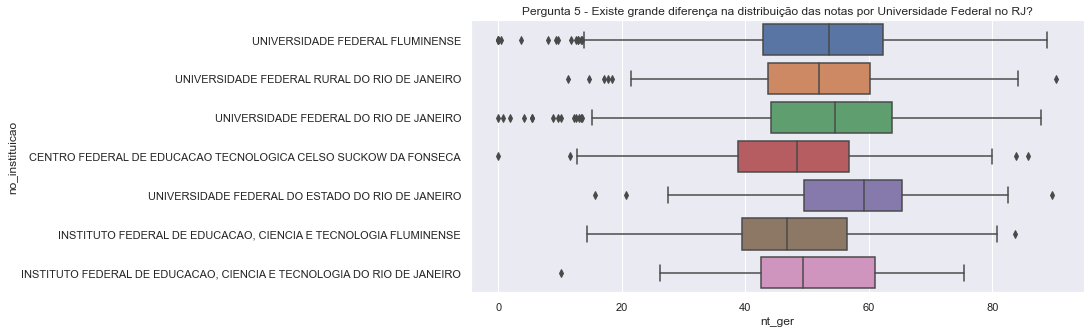

In [58]:
ax = sns.boxplot(data=ds_univ, x='nt_ger', y='no_instituicao')
t = ax.set_title("Pergunta 5 - Existe grande diferença na distribuição das notas por Universidade Federal no RJ?")